In [ ]:
%matplotlib inline


Cumulative wind speed prediction
================================

Generate the image cumulative-wind-speed-prediction.png
for the interpolate section of scipy.rst.



Text(0, 0.5, 'Cumulative probability')

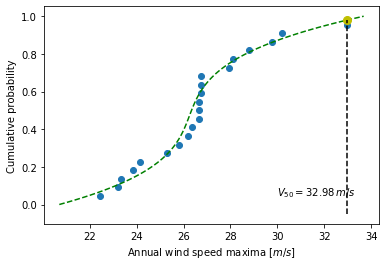

In [2]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)
speed_spline = UnivariateSpline(cprob, sorted_max_speeds)
nprob = np.linspace(0, 1, 1e2)
fitted_max_speeds = speed_spline(nprob)

fifty_prob = 1. - 0.02
fifty_wind = speed_spline(fifty_prob)

plt.figure()
plt.plot(sorted_max_speeds, cprob, 'o')
plt.plot(fitted_max_speeds, nprob, 'g--')
plt.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y')
plt.text(30, 0.05, '$V_{50} = %.2f \, m/s$' % fifty_wind)
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], 'k--')
plt.xlabel('Annual wind speed maxima [$m/s$]')
plt.ylabel('Cumulative probability')